# EDA

In [1]:
import collections

file_dict = collections.OrderedDict()
file_dict['../data/cft-train.zip'] = 'https://bucketeer-db1966c9-c9f8-427d-ae61-659a91a9fca7.s3.amazonaws.com/public/cft-train.zip'
file_dict['../data/cft-test.zip'] = 'https://bucketeer-db1966c9-c9f8-427d-ae61-659a91a9fca7.s3.amazonaws.com/public/cft-test.zip'

for file,url in file_dict.items():
    url_q = "'" + url + "'"
    ! wget --continue --no-check-certificate --no-proxy -O $file $url_q

--2018-10-08 09:40:50--  https://bucketeer-db1966c9-c9f8-427d-ae61-659a91a9fca7.s3.amazonaws.com/public/cft-train.zip
Resolving bucketeer-db1966c9-c9f8-427d-ae61-659a91a9fca7.s3.amazonaws.com (bucketeer-db1966c9-c9f8-427d-ae61-659a91a9fca7.s3.amazonaws.com)... 52.218.65.89
Connecting to bucketeer-db1966c9-c9f8-427d-ae61-659a91a9fca7.s3.amazonaws.com (bucketeer-db1966c9-c9f8-427d-ae61-659a91a9fca7.s3.amazonaws.com)|52.218.65.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43643973 (42M) [application/zip]
Saving to: '../data/cft-train.zip'

../data/cft-train.z 100%[===================>]  41.62M  7.25MB/s    in 6.6s    

2018-10-08 09:40:57 (6.33 MB/s) - '../data/cft-train.zip' saved [43643973/43643973]

--2018-10-08 09:40:57--  https://bucketeer-db1966c9-c9f8-427d-ae61-659a91a9fca7.s3.amazonaws.com/public/cft-test.zip
Resolving bucketeer-db1966c9-c9f8-427d-ae61-659a91a9fca7.s3.amazonaws.com (bucketeer-db1966c9-c9f8-427d-ae61-659a91a9fca7.s3.amazonaws.com)... 

In [1]:
!unzip ../data/cft-train.zip -d ../data/
!unzip ../data/cft-test.zip -d ../data/

Archive:  ../data/cft-train.zip
  inflating: ../data/train.csv       
Archive:  ../data/cft-test.zip
  inflating: ../data/test.csv        


In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [3]:
test_df.target.value_counts()

1    1013371
0     935422
2      42311
Name: target, dtype: int64

In [4]:
cns = train_df.country.value_counts()
top_countries = list(cns[cns>200].index)
train_df['country'] = train_df['country'].apply(lambda x: x if x in top_countries else 'OTHER')

In [5]:
train_df.country.value_counts()

РОССИЯ                   1342430
ТАДЖИКИСТАН               159770
УЗБЕКИСТАН                156234
КЫРГЫЗСТАН                 90851
КАЗАХСТАН                  53512
УКРАИНА                    39992
MOLDOVA                    31818
МОЛДОВА                    19789
RUS                        13618
UZBEKISTAN                 11441
BLR                         8609
OTHER                       7823
ГРУЗИЯ                      7476
КЫРГЫЗСКАЯ РЕСПУБЛИКА       5193
РОССИЙСКАЯ ФЕДЕРАЦИЯ        4474
АРМЕНИЯ                     4412
GEORGIA                     4315
UKR                         4254
АЗЕРБАЙДЖАН                 4246
АБХАЗИЯ                     3612
AZERBAIJAN                  3300
ПМР                         2728
БЕЛАРУСЬ                    2401
UZB                         1672
КИРГИЗИЯ                     836
TJK                          786
ANDIJON VIL                  737
AZE                          547
М.О.                         518
МОЛДОВА, РЕСПУБЛИКА          476
НИГЕРИЯ   

In [23]:
pd.pivot_table(train_df,
               index='country',
               columns='target',
               values='fullname',
               aggfunc=pd.Series.nunique)

target,0,1,2
country,,,
ANDIJON VIL,338.0,383.0,1.0
AZE,232.0,294.0,NaN
AZERBAIJAN,1561.0,1677.0,NaN
BLR,3840.0,4486.0,NaN
GEORGIA,1965.0,2222.0,4.0
ISRAEL,91.0,112.0,NaN
KAZ,96.0,110.0,NaN
KGZ,137.0,162.0,1.0
MDA,178.0,215.0,NaN


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='char')

In [13]:
cv_test = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='char')

In [8]:
# learn the vocabulary
cv.fit(list(train_df.fullname)+list(train_df.dropna().fullname_true))

CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [14]:
# test
cv_test.fit(test_df.fullname)

CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [24]:
set(symbol_df_test[symbol_df_test['count']>4000].char).difference(set(symbol_df[symbol_df['count']>4000].char))

set()

In [23]:
set(symbol_df[symbol_df['count']>4000].char).difference(set(symbol_df_test[symbol_df_test['count']>4000].char))

set()

In [16]:
set(cv_test.vocabulary_).difference(cv.vocabulary_)

{',', '/', '1', '2', '3', '4', '?', '[', '|', 'Є'}

In [15]:
set(cv.vocabulary_).difference(cv_test.vocabulary_)

{'5', '_', 'а', 'б', 'д', 'и', 'н', 'р', 'х'}

In [17]:
symbol_df_test = pd.DataFrame(columns=['char','count'])
for symbol in cv_test.vocabulary_:
    symbol_df_test = symbol_df_test.append(pd.DataFrame(data={
        'char':[symbol],
        'count':len(test_df[test_df.fullname.apply(lambda x: True if symbol in x else False)])
    }))

In [9]:
symbol_df = pd.DataFrame(columns=['char','count'])
for symbol in cv.vocabulary_:
    symbol_df = symbol_df.append(pd.DataFrame(data={
        'char':[symbol],
        'count':len(train_df[train_df.fullname.apply(lambda x: True if symbol in x else False)])
    }))

In [14]:
symbol_df.to_csv('symbols.csv')

In [46]:
train_df[train_df.fullname.apply(lambda x: True if 'а' in x else False)]

,id,fullname,country,target,fullname_true
286958,286958,Шарбан Рихард -,МОЛДОВА,2,NaN


In [18]:
symbol_df_test['count'] = symbol_df_test['count'].astype(int)

In [20]:
symbol_df_test[symbol_df_test['count']<4000]

,char,count
0,І,22
0,`,30
0,Ї,3
0,2,1
0,/,1
0,1,1
0,4,1
0,Є,3
0,",",1
0,?,1


In [18]:
symbol_df[symbol_df['count']<4000]

,char,count
0,І,21
0,а,1
0,р,1
0,б,1
0,н,1
0,и,1
0,х,1
0,д,1
0,_,2
0,5,1


In [12]:
list(symbol_df[symbol_df['count']>4000].char.unique())

['A',
 'K',
 'H',
 'M',
 'E',
 'D',
 'O',
 'V',
 ' ',
 'Y',
 'G',
 'U',
 'R',
 'I',
 'Ф',
 'О',
 'З',
 'И',
 'Л',
 'В',
 'Р',
 'А',
 'М',
 'Ь',
 'Г',
 'У',
 'Ч',
 'Б',
 'Х',
 'Д',
 'Н',
 'Ш',
 'С',
 'Е',
 'Т',
 'К',
 'Ы',
 'П',
 'Ж',
 'Я',
 'Ю',
 'Й',
 'C',
 'S',
 'T',
 'L',
 'N',
 'Ъ',
 'Э',
 'Ц',
 'B',
 'J',
 'Щ',
 '-',
 '.',
 'Ё',
 'Z',
 'P',
 'X',
 'W',
 'F',
 "'",
 'Q']

In [43]:
len(cv.vocabulary_)

75

In [15]:
symbol_df

,char,count
0,A,219131
0,K,102485
0,H,122738
0,M,126047
0,E,135067
0,D,106453
0,O,180477
0,V,179476
0,,1975506
0,Y,89749


In [28]:
train_df.sample(n=20)

,id,fullname,country,target,fullname_true
1674722,1674722,DIDORA LARISA DMITRIYEVNA,УЗБЕКИСТАН,0,NaN
1330763,1330763,ЧИКУНОВ ВЯЧЕСЛАВ ГЕННАДТЬЕВИЧ,РОССИЯ,1,ЧИКУНОВ ВЯЧЕСЛАВ ГЕННАДЬЕВИЧ
1900680,1900680,МОЗОЛЬ РОМАН АЛЕКСАНДРОВИЧ,РОССИЯ,0,NaN
583663,583663,ТРИФАН ПЁЬТР,MOLDOVA,1,ТРИФАН ПЁТР
844500,844500,ХОЖИЕВ МАХМАДЮСУФ КАМОЛИЛИНОВИЧ,РОССИЯ,1,ХОЖИЕВ МАХМАДЮСУФ КАМОЛИДИНОВИЧ
550601,550601,TASHTEMIROVA MAKSUDAXON AMANOVNA,УЗБЕКИСТАН,0,NaN
816330,816330,МУХАММАДИЕВ БАХТИЁР ХУДОЙКУЛОВИЧ,ТАДЖИКИСТАН,0,NaN
1147217,1147217,СИЗОВ СЕРГЕЙ ВЛАДИМИРОВИЧ,РОССИЯ,0,NaN
422218,422218,ЗЕЛЕНКО АННА ЮРЬЕВНА,УКРАИНА,0,NaN
14579,14579,КАМБАРОВ БОТИРЖОН ЖУМАБОЕВИЧ,РОССИЯ,0,NaN


# Dataset class

In [1]:
import pandas as pd
from pytorch.symbols import symbol_list

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [5]:
train_df.sample(n=20)

,id,fullname,country,target,fullname_true
1003765,1003765,ГОИБОВ ЭЛЬДАР,РОССИЯ,0,NaN
1814726,1814726,ХОПЕРИА СЕРГО,ГРУЗИЯ,0,NaN
1937537,1937537,ИСМАИЛОВ АРИФ ИСМАИЛ ОГЛЫ,РОССИЯ,0,NaN
490273,490273,ХАЛИФАЕВ РАХМАТУЛЛО МАРДОНХОДЖАЕВИЧ,РОССИЯ,0,NaN
763314,763314,НУРОВ МЕХРОНШОХ ПИРБОЕВИЧ,РОССИЯ,0,NaN
1227264,1227264,СТЕБАЕВА ЕЛЕНА АЛЕКСАНДРОВНА,УКРАИНА,0,NaN
1212322,1212322,НАСРУЗОВ ШЕРАЛИ ХАМИТОВИЧ,УЗБЕКИСТАН,1,НАВРУЗОВ ШЕРАЛИ ХАМИТОВИЧ
170238,170238,ОТАЖАГОВАСАНОБАР ИЛХОМБОЕВНА,УЗБЕКИСТАН,1,ОТАЖАНОВА САНОБАР ИЛХОМБОЕВНА
614604,614604,АЛИКУЛОВ ДАВРОН ЖУМАЕВИЧ,РОССИЯ,0,NaN
1650211,1650211,КАЮМОВ АЛЕКСЕЙ МУРОДОВИПЧ,RUS,1,КАЮМОВ АЛЕКСЕЙ МУРОДОВИЧ


In [3]:
test_df.country.value_counts()

РОССИЯ                           1828080
УЗБЕКИСТАН                        230258
ТАДЖИКИСТАН                       229040
КЫРГЫЗСТАН                        129599
КАЗАХСТАН                          77120
УКРАИНА                            57843
MOLDOVA                            46253
МОЛДОВА                            28605
RUS                                20005
UZBEKISTAN                         16864
BLR                                12531
ГРУЗИЯ                             10894
КЫРГЫЗСКАЯ РЕСПУБЛИКА               7702
АРМЕНИЯ                             6533
GEORGIA                             6477
РОССИЙСКАЯ ФЕДЕРАЦИЯ                6346
UKR                                 6004
АЗЕРБАЙДЖАН                         5907
АБХАЗИЯ                             5122
AZERBAIJAN                          4733
ПМР                                 3905
БЕЛАРУСЬ                            3584
UZB                                 2421
КИРГИЗИЯ                            1237
TJK             

In [13]:
(train_df.fullname.apply(lambda x: len(x)).max(),
train_df.fullname_true.dropna().apply(lambda x: len(x)).max(),
test_df.fullname.apply(lambda x: len(x)).max())

(92, 89, 83)

In [10]:
train_df.head(),test_df.head()

(   id                           fullname country  target  \
 0   0                    AKHMEDOV YGURIY  РОССИЯ       1   
 1   1            ФОЗИЛОВ РАМИЛЬ ГУЛЛОВИЧ  РОССИЯ       1   
 2   2       ГОИБОВ АХЛИДДИН ШАМСУДИНОВИЧ  РОССИЯ       0   
 3   3  ХУСНЕУТДИНОВА МАРГАРИТА ФАХИМОВНА  РОССИЯ       1   
 4   4      НОВОКШОНОВА ИННА ВЛАДИМИРОВНА  РОССИЯ       0   
 
                       fullname_true  
 0                    AKHMEDOV YURIY  
 1            ФОЗИЛОВ РАМИЛЬ ГУЛОВИЧ  
 2                               NaN  
 3  ХУСНУТДИНОВА МАРГАРИТА ФАХИМОВНА  
 4                               NaN  ,
    id                        fullname     country
 0   0  ХУДАШКУРОВА ГУЛЗХОДА БЕРДИЕВНА  УЗБЕКИСТАН
 1   1          СВЕЖЕТЬФЛОГИСТОН АРСЕН      РОССИЯ
 2   2        ГУЛОМОВА СОЖИДА САНАЕВНА  УЗБЕКИСТАН
 3   3   КАМПЫШЕВА ГУЛЯИМ БЕЙСЕМБАЕВНА   КАЗАХСТАН
 4   4              OROSUMEBTOV MIRLAN      РОССИЯ)

In [7]:
cns = train_df.country.value_counts()
top_countries = list(cns[cns>100].index)
train_df['country'] = train_df['country'].apply(lambda x: x if x in top_countries else 'OTHER')
test_df['country'] = test_df['country'].apply(lambda x: x if x in top_countries else 'OTHER')

cn_dict = dict(zip(sorted(list(train_df['country'].unique())),
                   range(train_df['country'].nunique())))

train_df['country'] = train_df['country'].apply(lambda x: cn_dict[x])
test_df['country'] = test_df['country'].apply(lambda x: cn_dict[x])

In [11]:
train_df.country.value_counts()

44    1342430
48     159770
51     156234
34      90851
28      53512
52      39992
11      31818
36      19789
13      13618
18      11441
4        8609
25       7476
12       5671
33       5193
43       4474
21       4412
5        4315
16       4254
20       4246
19       3612
3        3300
41       2728
22       2401
17       1672
30        836
15        786
0         737
2         547
35        518
37        476
40        455
10        399
46        344
39        318
9         307
32        283
54        260
6         221
38        220
53        214
7         213
14        191
29        185
26        184
8         183
24        178
27        178
1         161
23        158
50        136
45        133
49        129
31        116
47        114
42        106
Name: country, dtype: int64

In [9]:
len(cn_dict)

55

In [5]:
cns_test = test_df.country.value_counts()
top_countries_test = list(cns_test[cns_test>200].index)
# train_df['country'] = train_df['country'].apply(lambda x: x if x in top_countries else 'OTHER')

In [35]:
train_df.shape,test_df.shape

((1991104, 5), (2767639, 3))

In [6]:
cns_test[cns_test.index.isin(set(top_countries_test).difference(set(top_countries)))]

Series([], Name: country, dtype: int64)

In [25]:
set(top_countries).difference(set(top_countries_test))

set()

In [23]:
cns_test

РОССИЯ                                        1828080
УЗБЕКИСТАН                                     230258
ТАДЖИКИСТАН                                    229040
КЫРГЫЗСТАН                                     129599
КАЗАХСТАН                                       77120
УКРАИНА                                         57843
MOLDOVA                                         46253
МОЛДОВА                                         28605
RUS                                             20005
UZBEKISTAN                                      16864
BLR                                             12531
ГРУЗИЯ                                          10894
КЫРГЫЗСКАЯ РЕСПУБЛИКА                            7702
АРМЕНИЯ                                          6533
GEORGIA                                          6477
РОССИЙСКАЯ ФЕДЕРАЦИЯ                             6346
UKR                                              6004
АЗЕРБАЙДЖАН                                      5907
АБХАЗИЯ                     

In [20]:
top_countries

['РОССИЯ',
 'ТАДЖИКИСТАН',
 'УЗБЕКИСТАН',
 'КЫРГЫЗСТАН',
 'КАЗАХСТАН',
 'УКРАИНА',
 'MOLDOVA',
 'МОЛДОВА',
 'RUS',
 'UZBEKISTAN',
 'BLR',
 'ГРУЗИЯ',
 'КЫРГЫЗСКАЯ РЕСПУБЛИКА',
 'РОССИЙСКАЯ ФЕДЕРАЦИЯ',
 'АРМЕНИЯ',
 'GEORGIA',
 'UKR',
 'АЗЕРБАЙДЖАН',
 'АБХАЗИЯ',
 'AZERBAIJAN',
 'ПМР',
 'БЕЛАРУСЬ',
 'UZB',
 'КИРГИЗИЯ',
 'TJK',
 'ANDIJON VIL',
 'AZE',
 'М.О.',
 'МОЛДОВА, РЕСПУБЛИКА',
 'НИГЕРИЯ',
 'MDA',
 'РФ',
 'НАМАНГАН',
 'KGZ',
 'КР',
 'ШАХРИХОН',
 'ISRAEL',
 'НАВОИЙ',
 'ФИЛИППИНЫ',
 'KAZ']

In [36]:
train_df[train_df.target.isin([1])]

,id,fullname,country,target,fullname_true
0,0,AKHMEDOV YGURIY,44,1,AKHMEDOV YURIY
1,1,ФОЗИЛОВ РАМИЛЬ ГУЛЛОВИЧ,44,1,ФОЗИЛОВ РАМИЛЬ ГУЛОВИЧ
3,3,ХУСНЕУТДИНОВА МАРГАРИТА ФАХИМОВНА,44,1,ХУСНУТДИНОВА МАРГАРИТА ФАХИМОВНА
5,5,МЕДЕТБЕК КЫЗЫ МАПАБАТ,34,1,МЕДЕТБЕК КЫЗЫ МАХАБАТ
7,7,ТИРКАШЕПВ МАШРАБ УСМОНОВИЧ,44,1,ТИРКАШЕВ МАШРАБ УСМОНОВИЧ
8,8,НАЛТАКЯН ГАМЬЛЕТ АЛЬБЕРТОВИЧ,13,1,НАЛТАКЯН ГАМЛЕТ АЛЬБЕРТОВИЧ
9,9,ГНИГОРЯН АННА ЛЕОНИДОВНА,44,1,ГРИГОРЯН АННА ЛЕОНИДОВНА
14,14,МУНРЗАБАЕВ УЗАК,12,1,МУРЗАБАЕВ УЗАК
15,15,CIUMAC SVETLANA IVCAN,11,1,CIUMAC SVETLANA IVAN
16,16,ЛУКЬЯНЧУК МАРИНА СЕРГЕЕВНВА,44,1,ЛУКЬЯНЧУК МАРИНА СЕРГЕЕВНА


In [31]:
train_df.loc[pd.isnull(train_df.fullname_true),'fullname_true'] = train_df.loc[pd.isnull(train_df.fullname_true),'fullname']

In [21]:
test_df.country.value_counts()

РОССИЯ                                        1828080
УЗБЕКИСТАН                                     230258
ТАДЖИКИСТАН                                    229040
КЫРГЫЗСТАН                                     129599
КАЗАХСТАН                                       77120
УКРАИНА                                         57843
MOLDOVA                                         46253
МОЛДОВА                                         28605
RUS                                             20005
UZBEKISTAN                                      16864
BLR                                             12531
ГРУЗИЯ                                          10894
КЫРГЫЗСКАЯ РЕСПУБЛИКА                            7702
АРМЕНИЯ                                          6533
GEORGIA                                          6477
РОССИЙСКАЯ ФЕДЕРАЦИЯ                             6346
UKR                                              6004
АЗЕРБАЙДЖАН                                      5907
АБХАЗИЯ                     

In [42]:
r_tuple = dset.__getitem__(0)

In [49]:
r_tuple[1]

tensor([[  63,   67],
        [   4,   68],
        [  14,   69],
        [  11,   70],
        [  16,   71],
        [   8,   72],
        [   7,   73],
        [  18,   74],
        [  25,   75],
        [   0,   76],
        [  28,   77],
        [  10,   78],
        [  24,   79],
        [  21,   80],
        [  12,   81],
        [  28,   82],
        [  66,   83],
        [  64,   84],
        [  64,   85],
        [  64,   86],
        [  64,   87],
        [  64,   88],
        [  64,   89],
        [  64,   90],
        [  64,   91],
        [  64,   92],
        [  64,   93],
        [  64,   94],
        [  64,   95],
        [  64,   96],
        [  64,   97],
        [  64,   98],
        [  64,   99],
        [  64,  100],
        [  64,  101],
        [  64,  102],
        [  64,  103],
        [  64,  104],
        [  64,  105],
        [  64,  106],
        [  64,  107],
        [  64,  108],
        [  64,  109],
        [  64,  110],
        [  64,  111],
        [ 

In [ ]:
[name,
                            name_processed.long(),
                            name_mmb.float(),
                            gt_name,
                            gt_name_processed,
                            gt_name_mmb,
                            target,
                            country]

In [43]:
len(r_tuple)

8

In [41]:
dset = MisprintDataset()

_start_ tag added to the dataset with index 63
_pad_ tag added to the dataset with index 64
_unk_ tag added to the dataset with index 65
_classify_ tag added to the dataset with index 66
_pos0_ tag added to the dataset with index 67
_pos1_ tag added to the dataset with index 68
_pos2_ tag added to the dataset with index 69
_pos3_ tag added to the dataset with index 70
_pos4_ tag added to the dataset with index 71
_pos5_ tag added to the dataset with index 72
_pos6_ tag added to the dataset with index 73
_pos7_ tag added to the dataset with index 74
_pos8_ tag added to the dataset with index 75
_pos9_ tag added to the dataset with index 76
_pos10_ tag added to the dataset with index 77
_pos11_ tag added to the dataset with index 78
_pos12_ tag added to the dataset with index 79
_pos13_ tag added to the dataset with index 80
_pos14_ tag added to the dataset with index 81
_pos15_ tag added to the dataset with index 82
_pos16_ tag added to the dataset with index 83
_pos17_ tag added to the

In [40]:
import torch
import numpy as np
import pandas as pd
import torch.utils.data as data
from pytorch.symbols import symbol_list
from sklearn.model_selection import StratifiedKFold

symbol_dict = dict(zip(sorted(symbol_list),
                       range(0,len(symbol_list))))

class MisprintDataset(data.Dataset):
    def __init__(self,
                 train_df_path='../data/train.csv',
                 test_df_path='../data/test.csv',
                 symbol_dict=symbol_dict, # only symbols in the pre-defined dict
                 mode='train', # train, val or test
                 
                 max_len=100, # good enough length for attention
                 fold=0,
                 
                 target_column='target',
                 name_column='fullname',
                 gt_name_column='fullname_true',
                 country_column='country',
                 
                 random_state=42,
                 return_meta=False,
                 return_string=False):
        
        train_df = pd.read_csv(train_df_path)
        test_df = pd.read_csv(test_df_path)
        self.s2i = symbol_dict
        
        self.mode = mode
        self.fold = fold
        self.max_len = max_len
        self.random_state = random_state

        
        cns = train_df.country.value_counts()
        top_countries = list(cns[cns>100].index)
        
        train_df['country'] = train_df['country'].apply(lambda x: x if x in top_countries else 'OTHER')
        train_df.loc[pd.isnull(train_df.fullname_true),
                     'fullname_true'] = train_df.loc[pd.isnull(train_df.fullname_true),
                                                     'fullname']
        
        test_df['country'] = test_df['country'].apply(lambda x: x if x in top_countries else 'OTHER')

        self.cn_dict = dict(zip(sorted(list(train_df['country'].unique())),
                                range(train_df['country'].nunique())))

        train_df['country'] = train_df['country'].apply(lambda x: self.cn_dict[x])
        test_df['country'] = test_df['country'].apply(lambda x: self.cn_dict[x])        
        

        self.train_names = train_df[name_column].values
        self.train_gt_names = train_df[gt_name_column].values
        self.train_targets = train_df[target_column].values
        self.train_countries = train_df[country_column].values
        
        self.test_names = test_df[name_column].values
        self.test_countries = test_df[country_column].values

        del train_df,test_df
        
        # check that unique tokens are present
        # otherwise add them to the dataset
        
        for new_tag in ['_start_','_pad_','_unk_','_classify_']:
            if new_tag not in self.s2i:
                self.s2i[new_tag] = len(self.s2i)
                print('{} tag added to the dataset with index {}'.format(new_tag,
                                                                         len(self.s2i)-1))               
        self.clf_token = self.s2i['_classify_']
        self.vocab_len = len(self.s2i)     
            
        # add position embeddings
        for i in range(0,self.max_len):
            pos_emb = '_pos{}_'.format(i)
            if pos_emb not in self.s2i:
                self.s2i[pos_emb] = len(self.s2i)
                print('{} tag added to the dataset with index {}'.format(pos_emb,
                                                                     len(self.s2i)-1))                   

        skf = StratifiedKFold(n_splits = 4,
                              shuffle = True,
                              random_state = self.random_state)

        f1, f2, f3, f4 = skf.split(list(self.train_names),
                                   list(self.train_countries))
 
        folds = [f1, f2, f3, f4]
        self.train_idx = folds[self.fold][0]
        self.val_idx = folds[self.fold][1] 

    def __getitem__(self, idx):
        if self.mode == 'train':
            _idx = self.train_idx[idx]
        elif self.mode == 'val':
            _idx = self.val_idx[idx]

        if self.mode in ('train','val'):
            name,gt_name,target,country = (self.train_names[_idx],
                                           self.train_gt_names[_idx],
                                           self.train_targets[_idx],
                                           self.train_countries[_idx])
            
            name_processed,name_mmb = self.process_name(name)
            gt_name_processed,gt_name_mmb = self.process_name(gt_name)  
            
            return_tuple = [name,
                            name_processed.long(),
                            name_mmb.float(),
                            gt_name,
                            gt_name_processed,
                            gt_name_mmb,
                            target,
                            country]
            
        elif self.mode == 'test':
            # idx, not _idx
            name,country = (self.train_names[idx],
                                           self.test_countries[idx])
            
            name_processed,name_mmb = self.process_name(name)
            
            return_tuple = [name,
                            name_processed.long(),
                            name_mmb.float(),
                            country]            
        
        return return_tuple
    
    def process_name(self,name):
        # start with the _start_ token
        processed = [self.s2i['_start_']] * 1              

        processed.extend([self.s2i[s] 
                          if s in self.s2i
                          else self.s2i['_unk_']
                          for s in name])
        
        # add classification token for the transformer model after the end of the name
        processed.extend([self.s2i['_classify_']] * 1)         
        
        l = len(processed)
        
        if len(processed) < self.max_len:
            processed.extend([self.s2i['_pad_']] 
                             * (self.max_len - len(processed)))
        
        processed = torch.tensor(processed).squeeze()
        
        # also embed positional information and masks
        # also account for the classification token
        mmb = np.zeros((self.max_len))
        mmb[:l] = 1
        mmb = torch.from_numpy(mmb)
        
        # position information that is added to the input embeddings in the TransformerModel
        # also account for the classification token
        
        pmb = np.arange(self.vocab_len, self.vocab_len + self.max_len)
        processed = torch.stack((processed,torch.from_numpy(pmb)),dim=1)
        
        return processed,mmb
        
    def __len__(self):
        if self.mode == 'train':
            return len(self.train_idx)
        elif self.mode == 'val':
            return len(self.val_idx)
        elif self.mode == 'test':
            return len(self.test_texts)  

# Launch the transformer pipeline

In [1]:
from pytorch.transformer_dataset import MisprintDataset

In [39]:
dset = MisprintDataset(add_cn_embeddings=True,mode='train')

In [36]:
tup = dset.__getitem__(4)

(name,
 name_processed,
 name_mmb,
 country) = tup

name,country

('НОВОКШОНОВА ИННА ВЛАДИМИРОВНА', 44)

In [40]:
tup = dset.__getitem__(4)

(name,
 name_processed,
 name_mmb,
 gt_name,
 gt_name_processed,
 gt_name_mmb,
 target,
 country) = tup

name,gt_name,country

('МЕДЕТБЕК КЫЗЫ МАПАБАТ', 'МЕДЕТБЕК КЫЗЫ МАХАБАТ', 34)

In [38]:
tup = dset.__getitem__(4)

(name,
 name_processed,
 name_mmb,
 gt_name,
 gt_name_processed,
 gt_name_mmb,
 target,
 country) = tup

name,gt_name,country

('КОНДРАТОВИЧ ЛЮДМИЛА АНДРЕЕВНА', 'КОНДРАТОВИЧ ЛЮДМИЛА АНДРЕЕВНА', 4)

In [30]:
dset.cn_dict

{'ANDIJON VIL': 0,
 'ARM': 1,
 'AZE': 2,
 'AZERBAIJAN': 3,
 'BLR': 4,
 'GEORGIA': 5,
 'ISRAEL': 6,
 'KAZ': 7,
 'KAZAKHSTAN': 8,
 'KGZ': 9,
 'MDA': 10,
 'MOLDOVA': 11,
 'OTHER': 12,
 'RUS': 13,
 'RUSSIAN FEDERATION': 14,
 'TJK': 15,
 'UKR': 16,
 'UZB': 17,
 'UZBEKISTAN': 18,
 'АБХАЗИЯ': 19,
 'АЗЕРБАЙДЖАН': 20,
 'АРМЕНИЯ': 21,
 'БЕЛАРУСЬ': 22,
 'ВЬЕТНАМ': 23,
 'Г. МОСКВА': 24,
 'ГРУЗИЯ': 25,
 'ДАЛЬНЕЕ ЗАРУБЕЖЬЕ': 26,
 'ИЗРАИЛЬ': 27,
 'КАЗАХСТАН': 28,
 'КАМЕРУН': 29,
 'КИРГИЗИЯ': 30,
 'КОТ-ДИВУАР': 31,
 'КР': 32,
 'КЫРГЫЗСКАЯ РЕСПУБЛИКА': 33,
 'КЫРГЫЗСТАН': 34,
 'М.О.': 35,
 'МОЛДОВА': 36,
 'МОЛДОВА, РЕСПУБЛИКА': 37,
 'НАВОИЙ': 38,
 'НАМАНГАН': 39,
 'НИГЕРИЯ': 40,
 'ПМР': 41,
 'РЕСПУБЛИКА КАЗАХСТАН': 42,
 'РОССИЙСКАЯ ФЕДЕРАЦИЯ': 43,
 'РОССИЯ': 44,
 'РТ': 45,
 'РФ': 46,
 'СЕРБИЯ': 47,
 'ТАДЖИКИСТАН': 48,
 'ТУРКМЕНИЯ': 49,
 'ТУРЦИЯ': 50,
 'УЗБЕКИСТАН': 51,
 'УКРАИНА': 52,
 'ФИЛИППИНЫ': 53,
 'ШАХРИХОН': 54}

In [27]:
dset.s2i

{' ': 0,
 "'": 1,
 '-': 2,
 '.': 3,
 'A': 4,
 'B': 5,
 'C': 6,
 'D': 7,
 'E': 8,
 'F': 9,
 'G': 10,
 'H': 11,
 'I': 12,
 'J': 13,
 'K': 14,
 'L': 15,
 'M': 16,
 'N': 17,
 'O': 18,
 'P': 19,
 'Q': 20,
 'R': 21,
 'S': 22,
 'T': 23,
 'U': 24,
 'V': 25,
 'W': 26,
 'X': 27,
 'Y': 28,
 'Z': 29,
 'Ё': 30,
 'А': 31,
 'Б': 32,
 'В': 33,
 'Г': 34,
 'Д': 35,
 'Е': 36,
 'Ж': 37,
 'З': 38,
 'И': 39,
 'Й': 40,
 'К': 41,
 'Л': 42,
 'М': 43,
 'Н': 44,
 'О': 45,
 'П': 46,
 'Р': 47,
 'С': 48,
 'Т': 49,
 'У': 50,
 'Ф': 51,
 'Х': 52,
 'Ц': 53,
 'Ч': 54,
 'Ш': 55,
 'Щ': 56,
 'Ъ': 57,
 'Ы': 58,
 'Ь': 59,
 'Э': 60,
 'Ю': 61,
 'Я': 62,
 '_start_': 63,
 '_pad_': 64,
 '_unk_': 65,
 '_classify_': 66,
 '_pos0_': 67,
 '_pos1_': 68,
 '_pos2_': 69,
 '_pos3_': 70,
 '_pos4_': 71,
 '_pos5_': 72,
 '_pos6_': 73,
 '_pos7_': 74,
 '_pos8_': 75,
 '_pos9_': 76,
 '_pos10_': 77,
 '_pos11_': 78,
 '_pos12_': 79,
 '_pos13_': 80,
 '_pos14_': 81,
 '_pos15_': 82,
 '_pos16_': 83,
 '_pos17_': 84,
 '_pos18_': 85,
 '_pos19_': 86,
 '_pos2

In [29]:
gt_name_processed[:,2]

tensor([ 201,  201,  201,  201,  201,  201,  201,  201,  201,  201,
         201,  201,  201,  201,  201,  201,  201,  201,  201,  201,
         201,  201,  201,  201,  201,  201,  201,  201,  201,  201,
         201,  201,  201,  201,  201,  201,  201,  201,  201,  201,
         201,  201,  201,  201,  201,  201,  201,  201,  201,  201,
         201,  201,  201,  201,  201,  201,  201,  201,  201,  201,
         201,  201,  201,  201,  201,  201,  201,  201,  201,  201,
         201,  201,  201,  201,  201,  201,  201,  201,  201,  201,
         201,  201,  201,  201,  201,  201,  201,  201,  201,  201,
         201,  201,  201,  201,  201,  201,  201,  201,  201,  201])

In [7]:
gt_name_mmb

tensor([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.], dtype=torch.float64)

In [21]:
name_processed[0:31]

tensor([[ 63,  67],
        [ 43,  68],
        [ 50,  69],
        [ 47,  70],
        [ 31,  71],
        [ 49,  72],
        [ 45,  73],
        [ 33,  74],
        [ 31,  75],
        [  0,  76],
        [ 47,  77],
        [ 45,  78],
        [ 38,  79],
        [ 43,  80],
        [ 42,  81],
        [ 39,  82],
        [ 62,  83],
        [  0,  84],
        [ 43,  85],
        [ 31,  86],
        [ 49,  87],
        [ 44,  88],
        [ 31,  89],
        [ 38,  90],
        [ 31,  91],
        [ 47,  92],
        [ 45,  93],
        [ 33,  94],
        [ 44,  95],
        [ 31,  96],
        [ 66,  97]])

In [ ]:
дут()

In [15]:
name_mmb.sum()

tensor(31.)

In [31]:
len(dset.s2i)

167

In [13]:
name_processed.shape

torch.Size([100, 2])

In [10]:
name,gt_name

('МУРАТОВА РОЗМЛИЯ МАТНАЗАРОВНА', 'МУРАТОВА РОЗАЛИЯ МАТНАЗАРОВНА')

In [34]:
for key,value in dset.cn_dict.items():
    print(key,value)

ANDIJON VIL 0
ARM 1
AZE 2
AZERBAIJAN 3
BLR 4
GEORGIA 5
ISRAEL 6
KAZ 7
KAZAKHSTAN 8
KGZ 9
MDA 10
MOLDOVA 11
OTHER 12
RUS 13
RUSSIAN FEDERATION 14
TJK 15
UKR 16
UZB 17
UZBEKISTAN 18
АБХАЗИЯ 19
АЗЕРБАЙДЖАН 20
АРМЕНИЯ 21
БЕЛАРУСЬ 22
ВЬЕТНАМ 23
Г. МОСКВА 24
ГРУЗИЯ 25
ДАЛЬНЕЕ ЗАРУБЕЖЬЕ 26
ИЗРАИЛЬ 27
КАЗАХСТАН 28
КАМЕРУН 29
КИРГИЗИЯ 30
КОТ-ДИВУАР 31
КР 32
КЫРГЫЗСКАЯ РЕСПУБЛИКА 33
КЫРГЫЗСТАН 34
М.О. 35
МОЛДОВА 36
МОЛДОВА, РЕСПУБЛИКА 37
НАВОИЙ 38
НАМАНГАН 39
НИГЕРИЯ 40
ПМР 41
РЕСПУБЛИКА КАЗАХСТАН 42
РОССИЙСКАЯ ФЕДЕРАЦИЯ 43
РОССИЯ 44
РТ 45
РФ 46
СЕРБИЯ 47
ТАДЖИКИСТАН 48
ТУРКМЕНИЯ 49
ТУРЦИЯ 50
УЗБЕКИСТАН 51
УКРАИНА 52
ФИЛИППИНЫ 53
ШАХРИХОН 54


In [41]:
len(dset.s2i)

222

# Test datasets

In [1]:
import torch
from pytorch.transformer_dataset import MisprintDataset

In [2]:
base_dset_kwargs = {
    'mode':'train',
    'fold':0,
    'random_state':42,
    'add_cn_embeddings':False,
}

In [5]:
(train_dataset,val_dataset,test_dataset,
 train_loader,val_loader,test_loader) = get_datasets(base_dset_kwargs)

_start_ tag added to the dataset with index 63
_pad_ tag added to the dataset with index 64
_unk_ tag added to the dataset with index 65
_classify_ tag added to the dataset with index 66
_pos0_ tag added to the dataset with index 67
_pos1_ tag added to the dataset with index 68
_pos2_ tag added to the dataset with index 69
_pos3_ tag added to the dataset with index 70
_pos4_ tag added to the dataset with index 71
_pos5_ tag added to the dataset with index 72
_pos6_ tag added to the dataset with index 73
_pos7_ tag added to the dataset with index 74
_pos8_ tag added to the dataset with index 75
_pos9_ tag added to the dataset with index 76
_pos10_ tag added to the dataset with index 77
_pos11_ tag added to the dataset with index 78
_pos12_ tag added to the dataset with index 79
_pos13_ tag added to the dataset with index 80
_pos14_ tag added to the dataset with index 81
_pos15_ tag added to the dataset with index 82
_pos16_ tag added to the dataset with index 83
_pos17_ tag added to the

Val dataset initialized
_start_ tag added to the dataset with index 63
_pad_ tag added to the dataset with index 64
_unk_ tag added to the dataset with index 65
_classify_ tag added to the dataset with index 66
_pos0_ tag added to the dataset with index 67
_pos1_ tag added to the dataset with index 68
_pos2_ tag added to the dataset with index 69
_pos3_ tag added to the dataset with index 70
_pos4_ tag added to the dataset with index 71
_pos5_ tag added to the dataset with index 72
_pos6_ tag added to the dataset with index 73
_pos7_ tag added to the dataset with index 74
_pos8_ tag added to the dataset with index 75
_pos9_ tag added to the dataset with index 76
_pos10_ tag added to the dataset with index 77
_pos11_ tag added to the dataset with index 78
_pos12_ tag added to the dataset with index 79
_pos13_ tag added to the dataset with index 80
_pos14_ tag added to the dataset with index 81
_pos15_ tag added to the dataset with index 82
_pos16_ tag added to the dataset with index 83


In [5]:
len(train_dataset.s2i),len(val_dataset.s2i),len(test_dataset.s2i)

(167, 167, 167)

In [7]:
len(train_dataset),len(val_dataset)

(1493308, 497796)

In [9]:
val_dataset.s2i == train_dataset.s2i

True

In [6]:
{**base_dset_kwargs,
                                   **{'mode':'val'}}

{'mode': 'val', 'fold': 0, 'random_state': 42, 'add_cn_embeddings': False}

In [3]:
train_dataset = MisprintDataset(**{**base_dset_kwargs,
                                   **{'mode':'train'}})

_start_ tag added to the dataset with index 63
_pad_ tag added to the dataset with index 64
_unk_ tag added to the dataset with index 65
_classify_ tag added to the dataset with index 66
_pos0_ tag added to the dataset with index 67
_pos1_ tag added to the dataset with index 68
_pos2_ tag added to the dataset with index 69
_pos3_ tag added to the dataset with index 70
_pos4_ tag added to the dataset with index 71
_pos5_ tag added to the dataset with index 72
_pos6_ tag added to the dataset with index 73
_pos7_ tag added to the dataset with index 74
_pos8_ tag added to the dataset with index 75
_pos9_ tag added to the dataset with index 76
_pos10_ tag added to the dataset with index 77
_pos11_ tag added to the dataset with index 78
_pos12_ tag added to the dataset with index 79
_pos13_ tag added to the dataset with index 80
_pos14_ tag added to the dataset with index 81
_pos15_ tag added to the dataset with index 82
_pos16_ tag added to the dataset with index 83
_pos17_ tag added to the

In [4]:
val_dataset = MisprintDataset(**{**base_dset_kwargs,
                                   **{'mode':'val'}})

In [4]:
def get_datasets(base_dset_kwargs):
    global args

    train_dataset = MisprintDataset(**{**base_dset_kwargs,
                                       **{'mode':'train'}})
    print('Train dataset initialized')
    val_dataset   = MisprintDataset(**{**base_dset_kwargs,
                                       **{'mode':'val'}})
    print('Val dataset initialized')
    test_dataset  = MisprintDataset(**{**base_dset_kwargs,
                                       **{'mode':'test'}})
    print('Test dataset initialized')
    
    if True:
        pin_memory=False
    else:
        pin_memory=True
     

    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=10,        
        shuffle=True,
        sampler=None,
        num_workers=1,
        pin_memory=pin_memory,
        drop_last=False)
    
    val_loader = torch.utils.data.DataLoader(
        val_dataset,
        batch_size=10,        
        shuffle=True,
        sampler=None,
        num_workers=1,
        pin_memory=pin_memory,
        drop_last=False)
    
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=10,        
        shuffle=True,
        sampler=None,
        num_workers=1,
        pin_memory=pin_memory,
        drop_last=False)
    
    return train_dataset,val_dataset,test_dataset,train_loader,val_loader,test_loader

In [13]:
input[0]

tensor([[  63,  167],
        [  32,  168],
        [  31,  169],
        [  40,  170],
        [  44,  171],
        [  31,  172],
        [  38,  173],
        [  31,  174],
        [  47,  175],
        [  45,  176],
        [  33,  177],
        [   0,  178],
        [  43,  179],
        [  31,  180],
        [  52,  181],
        [  31,  182],
        [  43,  183],
        [  36,  184],
        [  35,  185],
        [  37,  186],
        [  31,  187],
        [  44,  188],
        [   0,  189],
        [  32,  190],
        [  31,  191],
        [  42,  192],
        [  49,  193],
        [  31,  194],
        [  32,  195],
        [  31,  196],
        [  36,  197],
        [  33,  198],
        [  39,  199],
        [  54,  200],
        [  66,  201],
        [  64,  202],
        [  64,  203],
        [  64,  204],
        [  64,  205],
        [  64,  206],
        [  64,  207],
        [  64,  208],
        [  64,  209],
        [  64,  210],
        [  64,  211],
        [ 

In [11]:
for i,(names,gt_names,
       input,gt,
       msk,target) in enumerate(train_loader):
    
    print(input.max(),gt.max())

tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tens

tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tens

tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tens

tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tens

tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tens

tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tens

tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tens

tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tens

Process Process-2:
KeyboardInterrupt
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 57, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/opt/conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 57, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/keras/notebook/nvme/cft_name/src/pytorch/transformer_dataset.py", line 122, in __getitem__
    gt_name_processed,gt_name_mmb = self.process_name(gt_name,country)
  File "/home/keras/notebook/nvme/cft_name/src/pytorch/transformer_dataset.py", line 186, in process_name
    processed = torch.stack((processed,torch.from_numpy(pmb)),dim=1)


tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tensor(266)
tensor(266) tens

KeyboardInterrupt: 

# Unique names

In [ ]:
import pandas as pd

train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [3]:
train_df.head()

,id,fullname,country,target,fullname_true
0,0,AKHMEDOV YGURIY,РОССИЯ,1,AKHMEDOV YURIY
1,1,ФОЗИЛОВ РАМИЛЬ ГУЛЛОВИЧ,РОССИЯ,1,ФОЗИЛОВ РАМИЛЬ ГУЛОВИЧ
2,2,ГОИБОВ АХЛИДДИН ШАМСУДИНОВИЧ,РОССИЯ,0,NaN
3,3,ХУСНЕУТДИНОВА МАРГАРИТА ФАХИМОВНА,РОССИЯ,1,ХУСНУТДИНОВА МАРГАРИТА ФАХИМОВНА
4,4,НОВОКШОНОВА ИННА ВЛАДИМИРОВНА,РОССИЯ,0,NaN


In [4]:
cond = pd.notnull(train_df.fullname_true)

In [9]:
train_df.loc[cond,'gt_len'] = train_df[cond].fullname_true.apply(lambda x: len(x.split()))

In [10]:
train_df.gt_len.value_counts()

3.0    811777
2.0    157017
4.0     44428
5.0       133
6.0        12
7.0         2
9.0         1
8.0         1
Name: gt_len, dtype: int64

In [13]:
train_df[train_df.gt_len>4]

,id,fullname,country,target,fullname_true,gt_len
4619,4619,КАНЫБЕК УУЛУ АЛМАЗ ЖУСУП ТЕГМНИ,РОССИЯ,1,КАНЫБЕК УУЛУ АЛМАЗ ЖУСУП ТЕГИНИ,5.0
6422,6422,ПИРМУХАММАД КАХРАМОН ХАЖИ ХКАМРО УГЛИ,РОССИЯ,1,ПИРМУХАММАД КАХРАМОН ХАЖИ ХАМРО УГЛИ,5.0
6796,6796,КУЛИЕВ НУРЕДДИН БАОЛА АГА ОГЛЫ,РОССИЯ,1,КУЛИЕВ НУРЕДДИН БАЛА АГА ОГЛЫ,5.0
16066,16066,ISAQOV AZIBEKM BAXROM O G LI,РОССИЯ,1,ISAQOV AZIBEK BAXROM O G LI,6.0
23641,23641,МУХТОРЗОДА САТИД МУХСИН САТИД АЛИ,ТАДЖИКИСТАН,1,МУХТОРЗОДА САИД МУХСИН САИД АЛИ,5.0
29953,29953,ЮЛДАШЕВ МАНУЧЕХР РАСВШАНЖОН - УГЛИ,РОССИЯ,1,ЮЛДАШЕВ МАНУЧЕХР РАВШАНЖОН - УГЛИ,5.0
65527,65527,НЕТО ХЕЛДЕР ДЕ ИИСУС ВСНЖ,РОССИЯ,1,НЕТО ХЕЛДЕР ДЕ ИИСУС ВАНЖ,5.0
72566,72566,БУВАМАТОВА ХУРШИДАБОНУУМАР АЛИ КИЗИ,УЗБЕКИСТАН,1,БУВАМАТОВА ХУРШИДАБОНУ УМАР АЛИ КИЗИ,5.0
75209,75209,ЭЙВАЗОВ ВАЛЕХ БАЙРАМ ГУЛЫУ ОГЛЫ,РОССИЯ,1,ЭЙВАЗОВ ВАЛЕХ БАЙРАМ ГУЛУ ОГЛЫ,5.0
76554,76554,АЛИХОНОВ БАХРИДДИН ЮСУФ АЗАМ УГЛШИ,РОССИЯ,1,АЛИХОНОВ БАХРИДДИН ЮСУФ АЗАМ УГЛИ,5.0


In [15]:
cond = pd.notnull(train_df.fullname_true)
names = train_df[cond].fullname_true.apply(lambda x: x.split())

In [16]:
names = [item for sublist in names for item in sublist]

In [18]:
len(set(names))

333800

In [19]:
import random

In [26]:
random.sample(names,10)

['ЗИЯЕВА',
 'НАБИЕВНА',
 'ПАПЯН',
 'ТАПДЫГ',
 'ТРУБКИНА',
 'АНДРЕЙ',
 'ЛЕОНИД',
 'ЮСУФДЖОН',
 'НИЯЗИМБЕТОВ',
 'ШИШКОВ']

In [8]:
train_df[cond].fullname_true.apply(lambda x: len(x.split())).value_counts()

3    811777
2    157017
4     44428
5       133
6        12
7         2
9         1
8         1
Name: fullname_true, dtype: int64

# Try sentence piece

In [27]:
!pip install sentencepiece

    100% |################################| 1.4MB 1.8MB/s ta 0:00:011
mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.0 requires cython, which is not installed.
distributed 1.22.0 requires msgpack, which is not installed.
tensorboard 1.8.0 has requirement bleach==1.5.0, but you'll have bleach 2.1.3 which is incompatible.
tensorboard 1.8.0 has requirement html5lib==0.9999999, but you'll have html5lib 1.0.1 which is incompatible.
kaggle-cli 0.12.13 has requirement lxml<4.1,>=4.0.0, but you'll have lxml 4.2.2 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [32]:
cond = pd.notnull(train_df.fullname_true)

In [33]:
queries = list(train_df.fullname.values)\
          + list(train_df[cond].fullname_true.values)\
          + list(test_df.fullname.values)

In [34]:
len(queries)

5772114

In [36]:
!rm queries.txt

In [37]:
import codecs
fname = 'queries.txt'
with codecs.open(fname,'w','utf-8') as f:
    for query in queries:
        f.write(query+'\n')

In [40]:
import sentencepiece as spm

pieces = 50000
spm.SentencePieceTrainer.Train('--input={} --model_prefix=m --vocab_size={}'
                               .format(fname,pieces))

True

In [41]:
import sentencepiece as spm

sp = spm.SentencePieceProcessor()
sp.Load("m.model")

True

In [43]:
from tqdm import tqdm

In [44]:
piece_df = pd.DataFrame(columns=['piece_id','piece_str','piece_score'])

with tqdm(total=len(range(0,pieces))) as pbar:
    for i in range(0,pieces):
        _ = {
            'piece_id':[i],
            'piece_str':[sp.IdToPiece(id=i)],
            'piece_score':[sp.GetScore(id=i)]
        }
        piece_df = piece_df.append(pd.DataFrame(_))
        pbar.update(1)

100%|██████████| 50000/50000 [03:54<00:00, 213.47it/s]


In [47]:
!pip install -U feather-format

    100% |################################| 11.6MB 2.5MB/s eta 0:00:01
Requirement not upgraded as not directly required: six>=1.0.0 in /opt/conda/lib/python3.6/site-packages (from pyarrow>=0.4.0->feather-format) (1.11.0)
Requirement not upgraded as not directly required: numpy>=1.14 in /opt/conda/lib/python3.6/site-packages (from pyarrow>=0.4.0->feather-format) (1.14.5)
  Running setup.py bdist_wheel for feather-format ... done
  Stored in directory: /home/keras/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built feather-format
mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.0 requires cython, which is not installed.
distributed 1.22.0 requires msgpack, which is not installed.
tensorboard 1.8.0 has requirement bleach==1.5.0, but you'll have bleach 2.1.3 which is incompatible.
tensorboard 1.8.0 has requirement html5lib==0.9999999, but you'll have html5lib 1.0.1 which is incompatible.
kaggle-cli 0.12.13 has requirement l

In [49]:
piece_df.reset_index(drop=True).to_feather('500k_piece_df.feather')

In [70]:
sample

,id,fullname,country,target,fullname_true,gt_len
559188,559188,ЮНИСОВ ЭЛМУРОД БЕЙЛЯР ОГЛЫ,РОССИЯ,0,NaN,NaN


In [79]:
sample = train_df.sample()
name = sample.fullname.values[0]
name_true = sample.fullname_true.values[0]
print('{} => {}'.format(name,sp.EncodeAsPieces(name)))
print('{} => {}'.format(name_true,sp.EncodeAsPieces(name_true)))

ХАККУЛОВ ИНОМИДДИН ГУЛОМРДДИНОВИЧ => ['▁ХАККУЛОВ', '▁ИНОМИДДИН', '▁ГУЛОМ', 'РДДИН', 'ОВИЧ']
ХАККУЛОВ ИНОМИДДИН ГУЛОМИДДИНОВИЧ => ['▁ХАККУЛОВ', '▁ИНОМИДДИН', '▁ГУЛОМИДДИН', 'ОВИЧ']


['▁СУЛТАН', 'ЛВ', '▁ВЕЛИК', 'УЛЛА', '▁СУЛТАН', '▁АГА', '▁ОГЛЫ']

In [51]:
piece_df

,piece_id,piece_str,piece_score
0,0,<unk>,0.000000
0,1,<s>,0.000000
0,2,</s>,0.000000
0,3,А,-3.757681
0,4,ОВИЧ,-4.222974
0,5,ИЧ,-4.448304
0,6,НА,-4.469272
0,7,ОВНА,-4.711529
0,8,ОВ,-5.202331
0,9,▁ОГЛЫ,-5.514947


# Estimate presets

In [1]:
import pandas as pd

train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [2]:
cond = pd.notnull(train_df.fullname_true)

In [3]:
train_df.loc[cond,'len_diff'] = train_df.loc[cond,['fullname','fullname_true']].apply(lambda x: len(x['fullname_true'])-len(x['fullname']), axis=1)

In [4]:
train_df.len_diff.value_counts()

-1.0    512485
 0.0    363751
 1.0    119915
-2.0     14202
 2.0      3010
 3.0         7
-3.0         1
Name: len_diff, dtype: int64

In [5]:
train_df[train_df['len_diff']==+1].sample(n=20)

,id,fullname,country,target,fullname_true,len_diff
1561713,1561713,ТАНИБЕКОВА ХАМИДА КИРГИЗБЕКОВА,РОССИЯ,1,ТАНИБЕКОВА ХАМИДА КИРГИЗБЕКОВНА,1.0
228472,228472,КИМ ЯРОСЛАВФЕДОРОВИЧ,РОССИЯ,1,КИМ ЯРОСЛАВ ФЕДОРОВИЧ,1.0
1286649,1286649,АЧИЛОВА ЗАРНИГОР КУДРАТОВА,УЗБЕКИСТАН,1,АЧИЛОВА ЗАРНИГОР КУДРАТОВНА,1.0
1429118,1429118,КАСЫМОВАМИРГУЛ,КЫРГЫЗСТАН,1,КАСЫМОВА МИРГУЛ,1.0
389878,389878,ЕРШОВ ИГШРЬ ЛАДИМИРОВИЧ,РОССИЯ,1,ЕРШОВ ИГОРЬ ВЛАДИМИРОВИЧ,1.0
423156,423156,BARSEGHYAN MARATMOVSENOVIXH,РОССИЯ,1,BARSEGHYAN MARAT MOVSENOVICH,1.0
1797994,1797994,АЛОЯН ГЕНРИ АРЕСТОВИЧ,РОССИЯ,1,АЛОЯН ГЕНРИК АРЕСТОВИЧ,1.0
1037395,1037395,ДАВИТАВЯНМИКАЕЛ МАКСИМОВИЧ,РОССИЯ,1,ДАВИТАВЯН МИКАЕЛ МАКСИМОВИЧ,1.0
1874210,1874210,ЧЁРНЫЙВЛАДИМИР ВЛАДИМИРОВИЧ,РОССИЯ,1,ЧЁРНЫЙ ВЛАДИМИР ВЛАДИМИРОВИЧ,1.0
1516137,1516137,HOVHANNANISYN AGNETA,РОССИЯ,1,HOVHANNANISYAN AGNETA,1.0


In [117]:
import numpy as np

In [279]:
from IPython.display import Markdown

def style_text(text,
               colour):
    return '<span style="background-color: {}">{}</span>'.format(colour,text)

def print_style(marked_text):
    display(Markdown(marked_text))
    
def process_text(name,gt_name,is_print=False):
    if type(gt_name) == float:
        return 0,0
    if is_print:
        print('Name {} / GT Name {}'.format(len(name),len(gt_name)))
    
    max_len = max(len(name),len(gt_name))
    
    if len(name)<max_len:
        name += ' '*(max_len-len(name))
        
    if len(gt_name)<max_len:
        gt_name += ' '*(max_len-len(gt_name))
    
    name = list(name)+['☠']
    gt_name = list(gt_name)+['☠']
    error_counter = 0
    error_list = []
    
    i =0 
    while i < max_len:
        # just a dumb styling
        if name[i]!=gt_name[i]:
            
            # character swap
            if name[i]==gt_name[i+1] and name[i+1]==gt_name[i]:
                name[i] = style_text(name[i],'#ff5050')
                name[i+1] = style_text(name[i+1],'#ff5050')
                error_list.append('swap')
                i += 1
            # deleted character:
            elif name[i]==gt_name[i+1]:
                name.insert(i, style_text('☐','#ff5050'))
                error_counter+=1
                error_list.append('del')
            # inserted extra character
            elif name[i+1]==gt_name[i]:
                name[i] = style_text(name[i],'#ff5050')
                gt_name.insert(i, style_text('☐','#3366ff'))
                error_counter+=1
                error_list.append('extra')
            else:
                # character replace
                name[i] = style_text(name[i],'#ff5050')
                error_counter+=1
                error_list.append('rep')
        i += 1
    if is_print:
        print('Errors {}'.format(error_counter))
        print_style(''.join(name))
        print_style(''.join(gt_name))
    
    return error_counter,error_list

def get_errors(name,gt_name):
    max_len = max(len(name),len(gt_name))
    
    if len(name)<max_len:
        name += ' '*(max_len-len(name))

    if len(gt_name)<max_len:
        gt_name += ' '*(max_len-len(gt_name))    
    
    i = 0
    
    name = list(name)+['☠']
    gt_name = list(gt_name)+['☠']    
    
    error_positions = []
    error_corrections = []
    
    while i < max_len:
        # just a dumb styling
        if name[i]!=gt_name[i]:    
            # character swap
            try:
                if name[i]==gt_name[i+1] and name[i+1]==gt_name[i]:
                    error_positions.append(i)
                    error_corrections.append('_swap_')
                    # pass the next character as well
                    i += 1

                # deleted character:
                elif name[i]==gt_name[i+1]:
                    error_positions.append(i)
                    error_corrections.append('_insert_')
                    name.insert(i,' ')

                # inserted extra character
                elif name[i+1]==gt_name[i]:
                    error_positions.append(i)
                    error_corrections.append('_del_') 
                    gt_name.insert(i,' ')
                else:
                    # character replace
                    error_positions.append(i)
                    error_corrections.append(gt_name[i])
            except:
                pass
        i += 1
                
    return error_positions,error_corrections

In [202]:
error_positions,error_corrections = get_errors('СФААРАЛИЕВ САИДКУЛ АЛИКУЛОВИЧ',
                                        'САФАРАЛИЕВ САИДКУЛ АЛИКУЛОВИЧ')
print(error_positions,error_corrections)

[1] ['_swap_']


In [251]:
error_counter,error_list = process_text('СФААРАЛИЕВ САИДКУЛ АЛИКУЛОВИЧ',
                                        'САФАРАЛИЕВ САИДКУЛ АЛИКУЛОВИЧ',is_print=True)
print(error_list)

Name 29 / GT Name 29
Errors 0


С<span style="background-color: #ff5050">Ф</span><span style="background-color: #ff5050">А</span>АРАЛИЕВ САИДКУЛ АЛИКУЛОВИЧ☠

САФАРАЛИЕВ САИДКУЛ АЛИКУЛОВИЧ☠

['swap']


In [289]:
sample = train_df[cond].sample()

name = sample.fullname.values[0]
gt_name = sample.fullname_true.values[0]

print(name,gt_name)

error_counter,error_list = process_text(name,
                                        gt_name,
                                        is_print=True)

error_positions,error_corrections = get_errors(name,
                                               gt_name)
print(error_positions,error_corrections)



ТАРЛАНЗАДЕ СУХОРОБ ГУДРАТ ОГЛЫ ТАРЛАНЗАДЕ СУХРОБ ГУДРАТ ОГЛЫ
Name 30 / GT Name 29
Errors 1


ТАРЛАНЗАДЕ СУХ<span style="background-color: #ff5050">О</span><span style="background-color: #ff5050">Р</span><span style="background-color: #ff5050">О</span>Б ГУДРАТ ОГЛЫ☠

ТАРЛАНЗАДЕ СУХРО<span style="background-color: #3366ff">☐</span>Б ГУДРАТ ОГЛЫ ☠

[14, 16] ['_swap_', '_del_']


In [292]:
name = 'ОШКА'
gt_name = 'КОШКА'

print(name,gt_name)

error_counter,error_list = process_text(name,
                                        gt_name,
                                        is_print=True)

error_positions,error_corrections = get_errors(name,
                                               gt_name)
print(error_positions,error_corrections)



ОШКА КОШКА
Name 4 / GT Name 5
Errors 1


<span style="background-color: #ff5050">☐</span>ОШКА ☠

КОШКА☠

[0] ['_insert_']


In [293]:
name = 'ЁОШКА'
gt_name = 'КОШКА'

print(name,gt_name)

error_counter,error_list = process_text(name,
                                        gt_name,
                                        is_print=True)

error_positions,error_corrections = get_errors(name,
                                               gt_name)
print(error_positions,error_corrections)



ЁОШКА КОШКА
Name 5 / GT Name 5
Errors 1


<span style="background-color: #ff5050">Ё</span>ОШКА☠

КОШКА☠

[0] ['К']


In [24]:
' '*2

'  '

In [ ]:
[a] + li 

In [149]:
cond = (pd.notnull(train_df.fullname_true))
sum(cond)

1013371

In [123]:
type(train_df.iloc[2].fullname_true)

float

In [167]:
train_df['error_list'] = ''

In [179]:
train_df['error_count'] = train_df[['fullname','fullname_true']].apply(lambda row: process_text(row['fullname'],row['fullname_true'])[0],  axis=1)

In [180]:
train_df['error_list'] = train_df[['fullname','fullname_true']].apply(lambda row: process_text(row['fullname'],row['fullname_true'])[1],  axis=1)

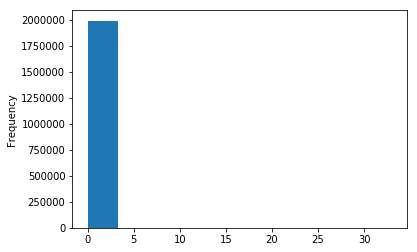

In [182]:
train_df.error_count.plot(kind='hist')

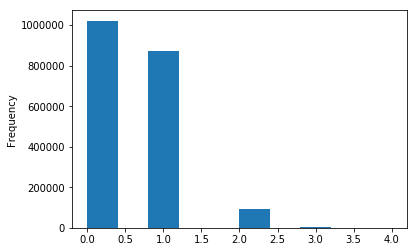

In [181]:
train_df[train_df.error_count<5].error_count.plot(kind='hist')

In [195]:
train_df.error_count.value_counts()

0     1021604
1      874088
2       91218
3        3470
4          88
10         63
9          58
11         55
6          52
12         42
8          41
7          40
5          35
14         31
13         27
16         27
19         25
15         25
18         23
17         21
21         20
20         16
22         11
23          5
24          5
26          4
25          2
27          2
29          2
31          1
32          1
30          1
33          1
Name: error_count, dtype: int64

In [185]:
error_counter,error_list = process_text('ПРОКОФЬЕВЛАДИМИР СЕРГЕЕВИЧ',
                                        'ПРОКОФЬЕВ ВЛАДИМИР СЕРГЕЕВИЧ',is_print=True)
print(error_list)

Name 26 / GT Name 28
Errors 17


ПРОКОФЬЕВ<span style="background-color: #ff5050">Л</span><span style="background-color: #ff5050">А</span><span style="background-color: #ff5050">Д</span><span style="background-color: #ff5050">И</span><span style="background-color: #ff5050">М</span>И<span style="background-color: #ff5050">Р</span><span style="background-color: #ff5050"> </span><span style="background-color: #ff5050">С</span><span style="background-color: #ff5050">Е</span><span style="background-color: #ff5050">Р</span><span style="background-color: #ff5050">Г</span>Е<span style="background-color: #ff5050">Е</span><span style="background-color: #ff5050">В</span><span style="background-color: #ff5050">И</span><span style="background-color: #ff5050">Ч</span><span style="background-color: #ff5050"> </span><span style="background-color: #ff5050"> </span>☠

ПРОКОФЬЕВ ВЛАДИМИР С<span style="background-color: #3366ff">☐</span>ЕРГЕЕВИЧ☠

['extra', 'extra', 'extra', 'extra', 'extra', 'extra', 'extra', 'extra', 'extra', 'extra', 'extra', 'extra', 'extra', 'extra', 'extra', 'extra', 'extra']


In [194]:
train_df[train_df.error_list.apply(lambda x: 'swap' in x if type(x)==list else False)]

,id,fullname,country,target,fullname_true,len_diff,error_count,error_list
18,18,АТКИЯЕВ ОЙЕБК ИБОДУЛОЕВИЧ,РОССИЯ,1,АТКИЯЕВ ОЙБЕК ИБОДУЛОЕВИЧ,0.0,0,[swap]
20,20,ЗАЙДУЛЕОВА РАЪНОГУЛ ЗОХИРОВНА,ТАДЖИКИСТАН,1,ЗАЙДУЛОЕВА РАЪНОГУЛ ЗОХИРОВНА,0.0,0,[swap]
45,45,РАМАЗАНОВА ФАТИМА МАХМДУОВНА,РОССИЯ,1,РАМАЗАНОВА ФАТИМА МАХМУДОВНА,0.0,0,[swap]
72,72,ВОЛКОВА ИНОБТА ТУХТАЕВНА,РОССИЯ,1,ВОЛКОВА ИНОБАТ ТУХТАЕВНА,0.0,0,[swap]
117,117,НУРИДИНОВ МАХМАДИЁР УКРБОНАЛИЕВИЧ,РОССИЯ,1,НУРИДИНОВ МАХМАДИЁР КУРБОНАЛИЕВИЧ,0.0,0,[swap]
126,126,ЗИЁЕВ ОТАЕБК АНВАР УГЛИ,РОССИЯ,1,ЗИЁЕВ ОТАБЕК АНВАР УГЛИ,0.0,0,[swap]
136,136,ТОПЧУБАЙ УУЛУ УКТТУБЕК,РОССИЯ,1,ТОПЧУБАЙ УУЛУ КУТТУБЕК,0.0,0,[swap]
212,212,ДЖУРАЕВА СИТРОА,РОССИЯ,1,ДЖУРАЕВА СИТОРА,0.0,0,[swap]
230,230,ММАЕДОВА РУХСАРА ЯВЕР КЫЗЫ,РОССИЯ,1,МАМЕДОВА РУХСАРА ЯВЕР КЫЗЫ,0.0,0,[swap]
248,248,ЗЯИЕВ УКТАМЖАН АБДУХАЛИКОВИЧ,РОССИЯ,1,ЗИЯЕВ УКТАМЖАН АБДУХАЛИКОВИЧ,0.0,0,[swap]


In [190]:
train_df[train_df['error_count']<3].sample(n=20)

,id,fullname,country,target,fullname_true,len_diff,error_count,error_list
1858373,1858373,КУЧРКИМОВ ЕРЖАН ГИСМЕТОЛЛАЕВИЧ,РОССИЯ,1,КУРКИМОВ ЕРЖАН ГИСМЕТОЛЛАЕВИЧ,-1.0,1,[extra]
1624543,1624543,ISMAULOV BAKHTIYOR,РОССИЯ,1,ISMAILOV BAKHTIYOR,0.0,1,[extra]
1387867,1387867,СИВОЛАП ГАЛИНА ВЛАДИМИРОВНА,РОССИЯ,0,NaN,NaN,0,0
367863,367863,СУЯТРОВА ЧЫНАРА ЯРАШЕВНА,УЗБЕКИСТАН,1,СУЯРОВА ЧЫНАРА ЯРАШЕВНА,-1.0,1,[extra]
910283,910283,СМИРНОВА ГАЛИНА СЕРГЕЕВЧНА,РОССИЯ,1,СМИРНОВА ГАЛИНА СЕРГЕЕВНА,-1.0,1,[extra]
354457,354457,ДЕХКОНОВ РУСТААЖОН ДЕХКОНОВИЧ,РОССИЯ,1,ДЕХКОНОВ РУСТАМЖОН ДЕХКОНОВИЧ,0.0,1,[extra]
1395194,1395194,ВИНОГРАДОВА НАТАЛЬЯ ВЛАДИМИРОВНА,РОССИЯ,0,NaN,NaN,0,0
1954169,1954169,NICORICI LUCREWTIA,РОССИЯ,1,NICORICI LUCRETIA,-1.0,1,[extra]
1891878,1891878,LYAN NADEJDA MIXAYLOVNA,УЗБЕКИСТАН,0,NaN,NaN,0,0
1165916,1165916,ЯБЛОНСКАЯ ВАЛЕНТИНАВИТАЛЬЕВНА,РОССИЯ,1,ЯБЛОНСКАЯ ВАЛЕНТИНА ВИТАЛЬЕВНА,1.0,1,[del]


In [183]:
train_df[train_df['error_count']>2].sample(n=20)

,id,fullname,country,target,fullname_true,len_diff,error_count,error_list
1038153,1038153,ГАХРАМАНОВ ААДЫГ МУСАОГЛЫ,РОССИЯ,1,ГАХРАМАНОВ САДЫГ МУСА ОГЛЫ,1.0,3,"[del, extra, del]"
1209396,1209396,ПОЛЕЩУК ВАЛЕРИЯ ВАЛЕРЬБЛЕВНА,ТАДЖИКИСТАН,1,ПОЛЕЩУК ВАЛЕРИЯ ВАЛЕРЬЕВНА,-2.0,6,"[extra, extra, extra, extra, extra, extra]"
1092348,1092348,ХУСЕНОВТАБЕК КОБИЛОВИЧ,УЗБЕКИСТАН,1,ХУСЕНОВ ОТАБЕК КОБИЛОВИЧ,2.0,16,"[extra, extra, extra, extra, extra, extra, ext..."
767632,767632,SLOVODERNIUCECATERINA,РОССИЯ,1,SLOBODENIUC ECATERINA,0.0,3,"[extra, extra, del]"
61546,61546,ЮЛДОШЕВ ЗЗАТИЛЛОБОВПОНАЗАРОВИЧ,ТАДЖИКИСТАН,1,ЮЛДОШЕВ ИЗЗАТИЛЛО БОВОНАЗАРОВИЧ,1.0,3,"[del, del, extra]"
807189,807189,САФАРОВ ДЖАМШЕД ДЖУРОМАХОНОВИЧ,ТАДЖИКИСТАН,1,САФАРОВ ДЖАМШЕД ДЖУРАХОНОВИЧ,-2.0,9,"[extra, extra, extra, extra, extra, extra, ext..."
1335300,1335300,ПРОКОФЬЕВЛАДИМИР СЕРГЕЕВИЧ,РОССИЯ,1,ПРОКОФЬЕВ ВЛАДИМИР СЕРГЕЕВИЧ,2.0,17,"[extra, extra, extra, extra, extra, extra, ext..."
1456443,1456443,ХШШИМОВА РАНОХОН АБДЮУЛЛАЖОНОВНА,УЗБЕКИСТАН,1,ХОШИМОВА РАНОХОН АБДУЛЛАЖОНОВНА,-1.0,3,"[del, extra, extra]"
1739593,1739593,БУТАЕВ ЬУРХАННИШАНОВВИЧ,УЗБЕКИСТАН,1,БУТАЕВ БУРХАН НИШАНОВИЧ,0.0,3,"[extra, del, extra]"
994095,994095,АРСЕНЬЕАА МАРИГА ИЛЬИНИЧНА,РОССИЯ,1,АРСЕНЬЕВА МАРИНА ИЛЬИНИЧНА,0.0,3,"[del, extra, extra]"


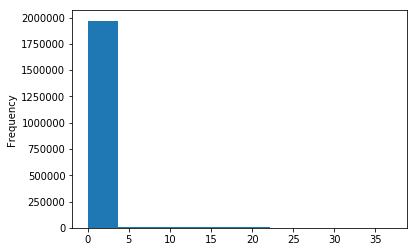

In [127]:
train_df['error_count'].plot(kind='hist')

Name 25 / GT Name 24
Errors 1


ДОРОХОВ ПАВЕЛ<span style="background-color: #ff5050">Б</span> АЛЕКСЕЕВИЧ☠

ДОРОХОВ ПАВЕЛ<span style="background-color: #3366ff">☐</span> АЛЕКСЕЕВИЧ ☠

In [23]:
print_style('the cat is on the ' + style_text('mat','#99ff99'))

the cat is on the <span style="background-color: #99ff99">mat</span>

In [ ]:
#99ff99 green
#ff5050 red
#3366ff blue

this is in <span style="background-color: #99ff99">red</span> color.

In [15]:
print("\x1b[31m\"red\"\x1b[0m")

"red"


In [13]:
train_df[train_df['len_diff']==0].sample(n=20)

,id,fullname,country,target,fullname_true,len_diff
1814340,1814340,КУДАКВ ВИКТОР ДМИТРИЕВИЧ,РОССИЯ,1,КУДАЕВ ВИКТОР ДМИТРИЕВИЧ,0.0
323185,323185,KUCHKZROV RASULJON,УЗБЕКИСТАН,1,KUCHKAROV RASULJON,0.0
1221155,1221155,МИЩЕНКО ВАЛАНТИНА СЕРГЕЕВНА,РОССИЯ,1,МИЩЕНКО ВАЛЕНТИНА СЕРГЕЕВНА,0.0
606293,606293,АБДУЛАЕВА МАХИРА САДИКОВЕА,КЫРГЫЗСТАН,1,АБДУЛАЕВА МАХИРА САДИКОВНА,0.0
1716733,1716733,ХУБУЛАШВИЛИ ИОСЕЛ,ГРУЗИЯ,1,ХУБУЛАШВИЛИ ИОСЕБ,0.0
31377,31377,ШАРИПОВ ДУСТУМУРОД МУРОДОЧИЧ,РОССИЯ,1,ШАРИПОВ ДУСТУМУРОД МУРОДОВИЧ,0.0
346867,346867,МКРТУМЯН ОССАННА КАМОЕВНА,РОССИЯ,1,МКРТУМЯН ОВСАННА КАМОЕВНА,0.0
1893244,1893244,КОСИМОВ САДРИТДИН АБДУВОТИОВИЧ,РОССИЯ,1,КОСИМОВ САДРИТДИН АБДУВОИТОВИЧ,0.0
426469,426469,БОТИРОЩ КУРВОНАЛИ МАШАРИПОВИЧ,РОССИЯ,1,БОТИРОВ КУРВОНАЛИ МАШАРИПОВИЧ,0.0
116569,116569,УСМАНОВ ЗАФСР ШУХРАТБЕКОВИЧ,РОССИЯ,1,УСМАНОВ ЗАФАР ШУХРАТБЕКОВИЧ,0.0


In [12]:
train_df[train_df['len_diff']==-1].sample(n=20)

,id,fullname,country,target,fullname_true,len_diff
1139380,1139380,МИРЗОЕВ КАХОР АБДУЛЛАХАЕЧВИЧ,ТАДЖИКИСТАН,1,МИРЗОЕВ КАХОР АБДУЛЛАХАЕВИЧ,-1.0
1200845,1200845,ГИБРАЩДЗЕ ГИОРГИ ВИТАЛИЕВИЧ,РОССИЯ,1,ГИБРАДЗЕ ГИОРГИ ВИТАЛИЕВИЧ,-1.0
1236205,1236205,ЖОМОНОВА ЗУЛХУМОР КУЧКАРОВГНА,УЗБЕКИСТАН,1,ЖОМОНОВА ЗУЛХУМОР КУЧКАРОВНА,-1.0
1982529,1982529,АБДУЛЛАЕВ ИЛЬНУР МАХАМПАДОВИЧ,РОССИЯ,1,АБДУЛЛАЕВ ИЛЬНУР МАХАМАДОВИЧ,-1.0
1824094,1824094,МСИДДИКОВ БАХРУЛЛО НАРЗУЛЛОЕВИЧ,РОССИЯ,1,СИДДИКОВ БАХРУЛЛО НАРЗУЛЛОЕВИЧ,-1.0
739983,739983,БОБОМУРАНТОВ БОХОДИР КАРШИЕВИЧ,УЗБЕКИСТАН,1,БОБОМУРАТОВ БОХОДИР КАРШИЕВИЧ,-1.0
241761,241761,КУЛУЕВА АНЖЕЛИКА МАМАСАЛИЕВНСА,РОССИЯ,1,КУЛУЕВА АНЖЕЛИКА МАМАСАЛИЕВНА,-1.0
1712493,1712493,МАМАЩДОВ НАБИ ШАРОФОВИЧ,РОССИЯ,1,МАМАДОВ НАБИ ШАРОФОВИЧ,-1.0
1664347,1664347,РОБЛАКИДЗЕ ТАМАР,ГРУЗИЯ,1,РОБАКИДЗЕ ТАМАР,-1.0
1111101,1111101,ПОЛТАРУХИНА РОЗПА ВЛАДИМИРОВНА,РОССИЯ,1,ПОЛТАРУХИНА РОЗА ВЛАДИМИРОВНА,-1.0


# Try turning encoder - decoder into char level model

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math, copy, time
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class EncoderDecoder(nn.Module):
    """
    A standard Encoder-Decoder architecture. Base for this and many 
    other models.
    """
    def __init__(self, encoder, decoder, src_embed, trg_embed, generator):
        super(EncoderDecoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.src_embed = src_embed
        self.trg_embed = trg_embed
        self.generator = generator
        
    def forward(self, src, trg, src_mask, trg_mask, src_lengths, trg_lengths):
        """Take in and process masked src and target sequences."""
        encoder_hidden, encoder_final = self.encode(src, src_mask, src_lengths)
        return self.decode(encoder_hidden, encoder_final, src_mask, trg, trg_mask)
    
    def encode(self, src, src_mask, src_lengths):
        return self.encoder(self.src_embed(src), src_mask, src_lengths)
    
    def decode(self, encoder_hidden, encoder_final, src_mask, trg, trg_mask,
               decoder_hidden=None):
        return self.decoder(self.trg_embed(trg), encoder_hidden, encoder_final,
                            src_mask, trg_mask, hidden=decoder_hidden)
   
class Generator(nn.Module):
    """Define standard linear + softmax generation step."""
    def __init__(self, hidden_size, vocab_size):
        super(Generator, self).__init__()
        self.proj = nn.Linear(hidden_size, vocab_size, bias=False)

    def forward(self, x):
        return F.log_softmax(self.proj(x), dim=-1)
    
class Encoder(nn.Module):
    """Encodes a sequence of word embeddings"""
    def __init__(self, input_size, hidden_size, num_layers=1, dropout=0.):
        super(Encoder, self).__init__()
        self.num_layers = num_layers
        self.rnn = nn.GRU(input_size, hidden_size, num_layers, 
                          batch_first=True, bidirectional=True, dropout=dropout)
        
    def forward(self, x, mask, lengths):
        """
        Applies a bidirectional GRU to sequence of embeddings x.
        The input mini-batch x needs to be sorted by length.
        x should have dimensions [batch, time, dim].
        """
        packed = pack_padded_sequence(x, lengths, batch_first=True)
        output, final = self.rnn(packed)
        output, _ = pad_packed_sequence(output, batch_first=True)

        # we need to manually concatenate the final states for both directions
        fwd_final = final[0:final.size(0):2]
        bwd_final = final[1:final.size(0):2]
        final = torch.cat([fwd_final, bwd_final], dim=2)  # [num_layers, batch, 2*dim]

        return output, final
    
class BahdanauAttention(nn.Module):
    """Implements Bahdanau (MLP) attention"""
    
    def __init__(self, hidden_size, key_size=None, query_size=None):
        super(BahdanauAttention, self).__init__()
        
        # We assume a bi-directional encoder so key_size is 2*hidden_size
        key_size = 2 * hidden_size if key_size is None else key_size
        query_size = hidden_size if query_size is None else query_size

        self.key_layer = nn.Linear(key_size, hidden_size, bias=False)
        self.query_layer = nn.Linear(query_size, hidden_size, bias=False)
        self.energy_layer = nn.Linear(hidden_size, 1, bias=False)
        
        # to store attention scores
        self.alphas = None
        
    def forward(self, query=None, proj_key=None, value=None, mask=None):
        assert mask is not None, "mask is required"

        # We first project the query (the decoder state).
        # The projected keys (the encoder states) were already pre-computated.
        query = self.query_layer(query)
        
        # Calculate scores.
        scores = self.energy_layer(torch.tanh(query + proj_key))
        scores = scores.squeeze(2).unsqueeze(1)
        
        # Mask out invalid positions.
        # The mask marks valid positions so we invert it using `mask & 0`.
        scores.data.masked_fill_(mask == 0, -float('inf'))
        
        # Turn scores to probabilities.
        alphas = F.softmax(scores, dim=-1)
        self.alphas = alphas        
        
        # The context vector is the weighted sum of the values.
        context = torch.bmm(alphas, value)
        
        # context shape: [B, 1, 2D], alphas shape: [B, 1, M]
        return context, alphas    
    
class Decoder(nn.Module):
    """A conditional RNN decoder with attention."""
    
    def __init__(self, emb_size, hidden_size, attention, num_layers=1, dropout=0.5,
                 bridge=True):
        super(Decoder, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.attention = attention
        self.dropout = dropout
                 
        self.rnn = nn.GRU(emb_size + 2*hidden_size, hidden_size, num_layers,
                          batch_first=True, dropout=dropout)
                 
        # to initialize from the final encoder state
        self.bridge = nn.Linear(2*hidden_size, hidden_size, bias=True) if bridge else None

        self.dropout_layer = nn.Dropout(p=dropout)
        self.pre_output_layer = nn.Linear(hidden_size + 2*hidden_size + emb_size,
                                          hidden_size, bias=False)
        
    def forward_step(self, prev_embed, encoder_hidden, src_mask, proj_key, hidden):
        """Perform a single decoder step (1 word)"""

        # compute context vector using attention mechanism
        query = hidden[-1].unsqueeze(1)  # [#layers, B, D] -> [B, 1, D]
        context, attn_probs = self.attention(
            query=query, proj_key=proj_key,
            value=encoder_hidden, mask=src_mask)

        # update rnn hidden state
        rnn_input = torch.cat([prev_embed, context], dim=2)
        output, hidden = self.rnn(rnn_input, hidden)
        
        pre_output = torch.cat([prev_embed, output, context], dim=2)
        pre_output = self.dropout_layer(pre_output)
        pre_output = self.pre_output_layer(pre_output)

        return output, hidden, pre_output
    
    def forward(self, trg_embed, encoder_hidden, encoder_final, 
                src_mask, trg_mask, hidden=None, max_len=None):
        """Unroll the decoder one step at a time."""
                                         
        # the maximum number of steps to unroll the RNN
        if max_len is None:
            max_len = trg_mask.size(-1)

        # initialize decoder hidden state
        if hidden is None:
            hidden = self.init_hidden(encoder_final)
        
        # pre-compute projected encoder hidden states
        # (the "keys" for the attention mechanism)
        # this is only done for efficiency
        proj_key = self.attention.key_layer(encoder_hidden)
        
        # here we store all intermediate hidden states and pre-output vectors
        decoder_states = []
        pre_output_vectors = []
        
        # unroll the decoder RNN for max_len steps
        for i in range(max_len):
            prev_embed = trg_embed[:, i].unsqueeze(1)
            output, hidden, pre_output = self.forward_step(
              prev_embed, encoder_hidden, src_mask, proj_key, hidden)
            decoder_states.append(output)
            pre_output_vectors.append(pre_output)

        decoder_states = torch.cat(decoder_states, dim=1)
        pre_output_vectors = torch.cat(pre_output_vectors, dim=1)
        return decoder_states, hidden, pre_output_vectors  # [B, N, D]

    def init_hidden(self, encoder_final):
        """Returns the initial decoder state,
        conditioned on the final encoder state."""

        if encoder_final is None:
            return None  # start with zeros

        return torch.tanh(self.bridge(encoder_final))
    
def make_model(src_vocab, tgt_vocab, emb_size=256, hidden_size=512, num_layers=1, dropout=0.1):
    "Helper: Construct a model from hyperparameters."

    attention = BahdanauAttention(hidden_size)

    model = EncoderDecoder(
        Encoder(emb_size, hidden_size, num_layers=num_layers, dropout=dropout),
        Decoder(emb_size, hidden_size, attention, num_layers=num_layers, dropout=dropout),
        nn.Embedding(src_vocab, emb_size),
        nn.Embedding(tgt_vocab, emb_size),
        Generator(hidden_size, tgt_vocab))

    return model.cuda() if USE_CUDA else model      

In [2]:
def greedy_decode(model, src, src_mask, src_lengths, max_len=100, sos_index=1, eos_index=None):
    """Greedily decode a sentence."""

    with torch.no_grad():
        encoder_hidden, encoder_final = model.encode(src, src_mask, src_lengths)
        prev_y = torch.ones(1, 1).fill_(sos_index).type_as(src)
        trg_mask = torch.ones_like(prev_y)

    output = []
    attention_scores = []
    hidden = None

    for i in range(max_len):
        with torch.no_grad():
            out, hidden, pre_output = model.decode(
              encoder_hidden, encoder_final, src_mask,
              prev_y, trg_mask, hidden)

            # we predict from the pre-output layer, which is
            # a combination of Decoder state, prev emb, and context
            prob = model.generator(pre_output[:, -1])

        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.data.item()
        output.append(next_word)
        prev_y = torch.ones(1, 1).type_as(src).fill_(next_word)
        attention_scores.append(model.decoder.attention.alphas.cpu().numpy())
    
    output = np.array(output)
        
    # cut off everything starting from </s> 
    # (only when eos_index provided)
    if eos_index is not None:
        first_eos = np.where(output==eos_index)[0]
        if len(first_eos) > 0:
            output = output[:first_eos[0]]      
    
    return output, np.concatenate(attention_scores, axis=1)
  

def lookup_words(x, vocab=None):
    if vocab is not None:
        x = [vocab.itos[i] for i in x]

    return [str(t) for t in x]

# Dataset for encoder decoder

In [8]:
import torch
import numpy as np

def data_gen(num_words=11, batch_size=16, num_batches=100, length=10, pad_index=0, sos_index=1):
    """Generate random data for a src-tgt copy task."""
    for i in range(num_batches):
        data = torch.from_numpy(
          np.random.randint(1, num_words, size=(batch_size, length)))
        data[:, 0] = sos_index
        src = data[:, 1:]
        trg = data
        src_lengths = [length-1] * batch_size
        trg_lengths = [length] * batch_size
        yield Batch((src, src_lengths), (trg, trg_lengths), pad_index=pad_index)

In [14]:
class Batch:
    """Object for holding a batch of data with mask during training.
    Input is a batch from a torch text iterator.
    """
    def __init__(self, src, trg, pad_index=0):
        
        src, src_lengths = src
        
        self.src = src
        self.src_lengths = src_lengths
        self.src_mask = (src != pad_index).unsqueeze(-2)
        self.nseqs = src.size(0)
        
        self.trg = None
        self.trg_y = None
        self.trg_mask = None
        self.trg_lengths = None
        self.ntokens = None

        if trg is not None:
            trg, trg_lengths = trg
            self.trg = trg[:, :-1]
            self.trg_lengths = trg_lengths
            self.trg_y = trg[:, 1:]
            self.trg_mask = (self.trg_y != pad_index)
            self.ntokens = (self.trg_y != pad_index).data.sum().item()

In [15]:
gen = data_gen(num_words=11, batch_size=16, num_batches=100, length=10, pad_index=0, sos_index=1)

In [31]:
batch.nseqs

16

In [17]:
batch = next(gen)

In [29]:
batch.src

tensor([[  5,   1,   7,   1,   3,   9,   1,   5,   7],
        [ 10,   3,   7,   9,   2,   3,   9,   8,   2],
        [  6,   8,   6,   8,   5,   1,   1,   5,   4],
        [  2,   3,  10,   2,   8,  10,   6,   6,   7],
        [  7,   5,   4,  10,   7,   5,   3,   1,   1],
        [  4,   9,   6,  10,  10,   6,   3,   5,   6],
        [  8,   6,   4,   8,   8,   4,   8,   7,   4],
        [  4,   8,   5,   8,   9,  10,   5,   9,   4],
        [  8,  10,   4,   7,   5,   6,   4,   4,   4],
        [  2,   9,   8,  10,   4,   2,   9,   1,  10],
        [  3,   2,  10,   4,   2,   7,   1,  10,  10],
        [  8,   4,   1,   1,   8,   6,   9,   5,   9],
        [  1,   5,   6,   2,   7,   6,  10,   6,   5],
        [  1,   9,   9,   7,   6,   8,   8,   1,   7],
        [  6,   9,   8,  10,   2,   2,   6,   4,   1],
        [  4,   9,   8,   2,   7,  10,   4,   7,   1]])

In [30]:
batch.trg

tensor([[  1,   5,   1,   7,   1,   3,   9,   1,   5],
        [  1,  10,   3,   7,   9,   2,   3,   9,   8],
        [  1,   6,   8,   6,   8,   5,   1,   1,   5],
        [  1,   2,   3,  10,   2,   8,  10,   6,   6],
        [  1,   7,   5,   4,  10,   7,   5,   3,   1],
        [  1,   4,   9,   6,  10,  10,   6,   3,   5],
        [  1,   8,   6,   4,   8,   8,   4,   8,   7],
        [  1,   4,   8,   5,   8,   9,  10,   5,   9],
        [  1,   8,  10,   4,   7,   5,   6,   4,   4],
        [  1,   2,   9,   8,  10,   4,   2,   9,   1],
        [  1,   3,   2,  10,   4,   2,   7,   1,  10],
        [  1,   8,   4,   1,   1,   8,   6,   9,   5],
        [  1,   1,   5,   6,   2,   7,   6,  10,   6],
        [  1,   1,   9,   9,   7,   6,   8,   8,   1],
        [  1,   6,   9,   8,  10,   2,   2,   6,   4],
        [  1,   4,   9,   8,   2,   7,  10,   4,   7]])

In [24]:
batch.src_mask.shape

torch.Size([16, 1, 9])

In [26]:
 batch.trg_mask.shape

torch.Size([16, 9])

In [22]:
batch.src_lengths, batch.trg_lengths

([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
 [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [ ]:
batch.src, batch.trg,
                                           batch.src_mask, batch.trg_mask,
                                           batch.src_lengths, batch.trg_lengths)